In [1]:
%config IPCompleter.greedy=True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(800, 1200, 3)


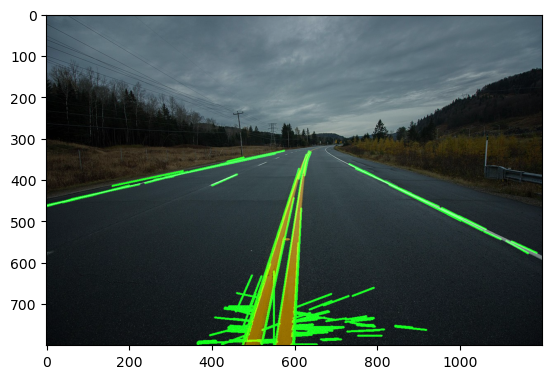

In [41]:
img = cv2.imread('/home/karen/Documents/Datasets/OpenCV/opencv/samples/data/road_lane.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
#     channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

def draw_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=3)
    
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img


# Define ROI
height = img.shape[0]
width = img.shape[1]

region_of_interest_vertices = [
    (0, height),
    (0, 450),
    (width / 2, (height / 2) - 80),
    (width, 510),
    (width, height)
]

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)
masked_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))

lines = cv2.HoughLinesP(masked_image,
                        rho=6,
                        theta=np.pi / 60,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)

image_with_lines = draw_lines(img, lines)

plt.imshow(image_with_lines)
plt.show()